In [1]:
using ModelingToolkit, OrdinaryDiffEq, Plots

## Free fall without air resistance

In [13]:
@parameters m g 
@variables t x(t)

p = [ m=>3e-3,  g=>9.8]

D=Differential(t)
v=D(x)
a=D(v)

eq = a ~ g 
@named sys=ODESystem(eq)
sys= ode_order_lowering(sys)

u₀=[ D(x)=>0,  x=>0]

tspan=(0,10)
prob=ODEProblem(sys,u₀,tspan,p,jac=true)
sol=solve(prob,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 7-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.011099999999999997
  0.11109999999999996
  1.1110999999999995
 10.0
u: 7-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.0009799999999999995, 4.899999999999973e-8]
 [0.010779999999999994, 5.92899999999997e-6]
 [0.10877999999999993, 0.0006037289999999973]
 [1.0887799999999992, 0.06048172899999975]
 [10.888779999999992, 6.04926172899997]
 [97.99999999999996, 489.99999999999795]

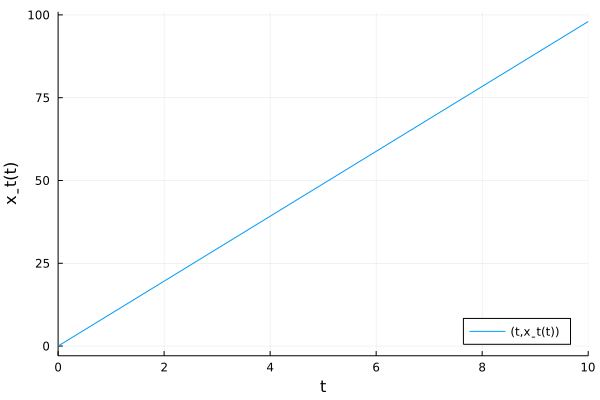

In [14]:
plot(sol,vars=(t,D(x)),legend=:bottomright)

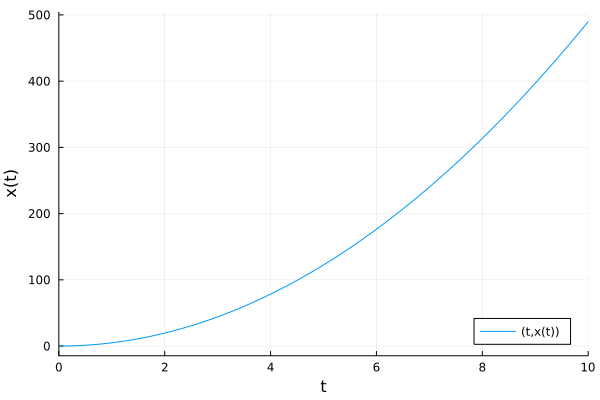

In [15]:
plot(sol,vars=(t,x),legend=:bottomright)

## Free fall with $F_d \propto v$

In [16]:
@parameters m g σ
@variables t x(t)

p = [ m=>3e-3,  g=>9.8,  σ=>0.001]

D=Differential(t)
v=D(x)
a=D(v)

eq = a ~ g-σ*v/m
@named sys = ODESystem(eq)
sys = structural_simplify(sys)

u₀ = [ v=>0,   x=>0]

tspan=(0,20)
prob=ODEProblem(sys,u₀,tspan,p,jac=true)
sol=solve(prob,Tsit5());

In [17]:
m,g,σ=last.(p)
vt=m*g/σ
v_a=vt*(1 .- exp.(-σ/m*sol.t))

19-element Vector{Float64}:
  0.0
  0.0009799836668479946
  0.010778023908195489
  0.10857900497028496
  0.687581524461896
  2.0960274299759534
  4.46462570242124
  7.6251587476028435
 11.325379270712487
 15.337727037199846
 19.241187947068155
 22.669083402270005
 25.349618356157578
 27.211893580943304
 28.35264202634334
 28.964085541300815
 29.24642692180637
 29.356019954101676
 29.362584566240614

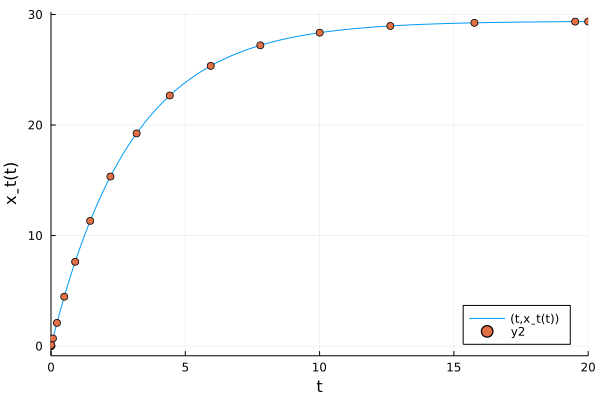

In [18]:
plot(sol,vars=(t,v),legend=:bottomright)
scatter!(sol.t,v_a)

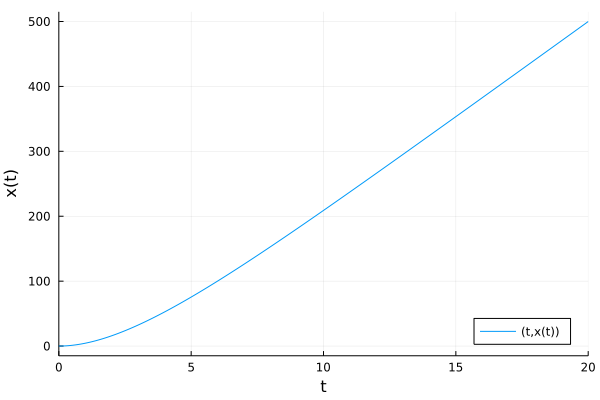

In [19]:
plot(sol,vars=(t,x),legend=:bottomright)

## Free fall with $F_d \propto v^2$

In [20]:
@parameters m g σ
@variables t x(t)

p = [ m=>3e-3,  g=>9.8,  σ=>0.001]

D = Differential(t)
v = D(x)
a = D(v)

eq = a ~ g-σ*v^2/m
@named sys = ODESystem(eq)
sys = structural_simplify(sys)

u0 = [ v=>0,   x=>0]

tspan=(0,5)
prob=ODEProblem(sys,u0,tspan,p,jac=true)
sol=solve(prob,Tsit5());

In [21]:
m,g,σ=last.(p)
vt=sqrt(m*g/σ)
v_a=vt*tanh.(σ*vt/m*sol.t)

19-element Vector{Float64}:
 0.0
 0.000979999989328889
 0.010779985796773566
 0.10876540820683246
 0.508300842735788
 1.1895239914763551
 2.0319529565018426
 2.9955353236261235
 3.975166363955842
 4.6601220760145905
 5.0546139191399035
 5.26823270974479
 5.365791567095126
 5.40503675838599
 5.418009815677859
 5.421436017650765
 5.42209103713322
 5.422171454729442
 5.422176531299715

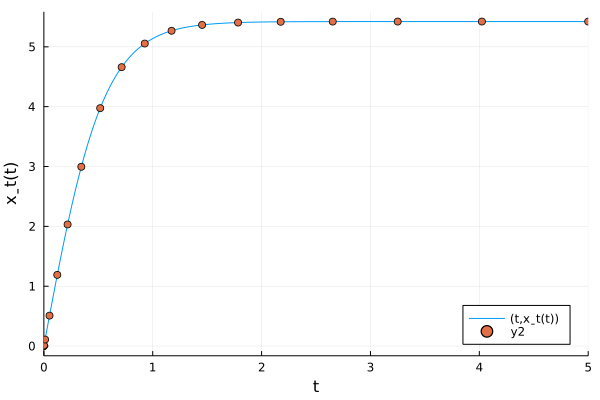

In [22]:
plot(sol,vars=(t,v),legend=:bottomright)
scatter!(sol.t,v_a)

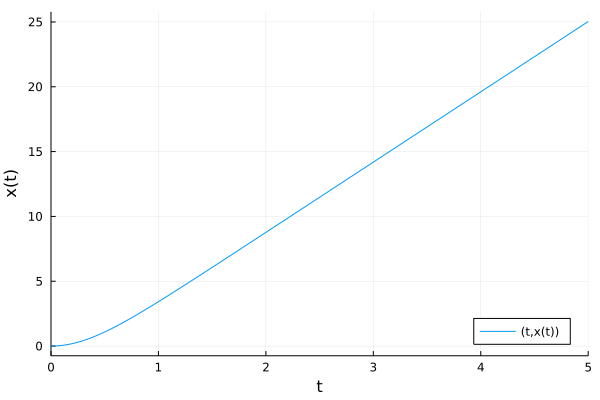

In [23]:
plot(sol,vars=(t,x),legend=:bottomright)